In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Since I want to also evaluate the categorical features by doing OneHoEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# To deal with NaN values of categorical features
from sklearn.impute import SimpleImputer

#Later I want to compare this analysis with Feature Importance analysis
from sklearn.ensemble import ExtraTreesClassifier

#Loading the data
data = pd.read_csv('dataset.csv')
prices = data['SalePrice']
features = data.drop('SalePrice', axis=1)

#Statistics
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price: ${}".format(median_price))
print("Standard deviation of prices price: ${}".format(std_price))

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price: $163000.0
Standard deviation of prices price: $79415.29188606751


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

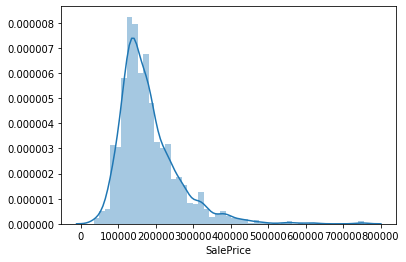

In [2]:
#Analysing the features
data.info()

#We have 38 continuous and 43 categorical features

#Sale price distribution
sns.distplot(prices)

#It seems that we have more samples with a sale price between 100k and 200k


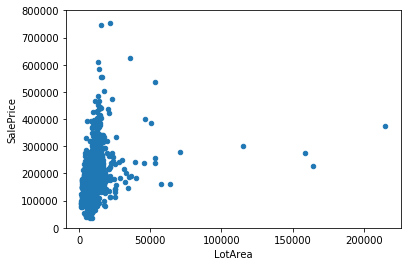

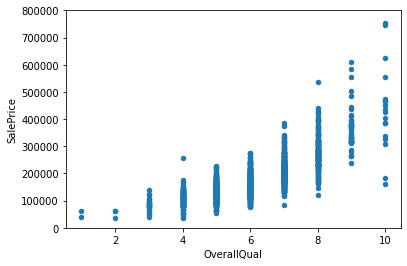

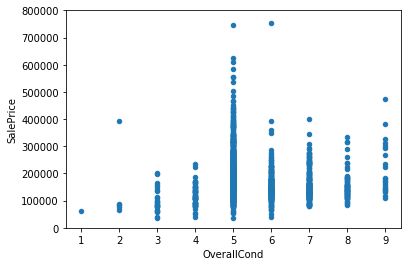

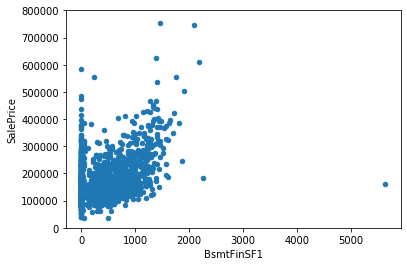

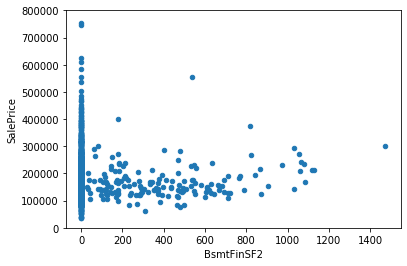

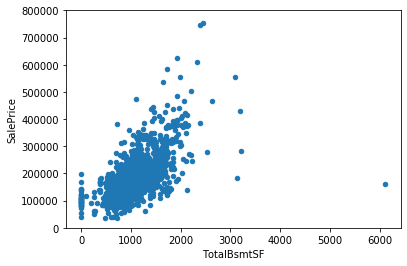

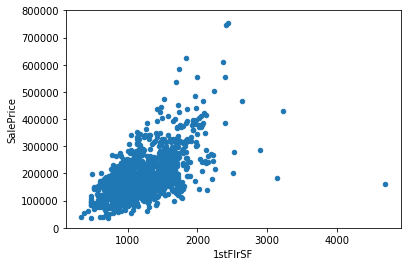

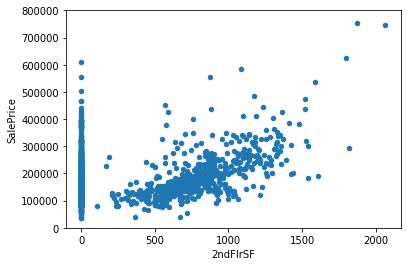

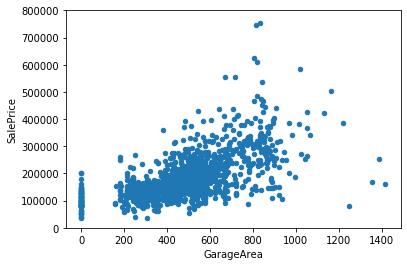

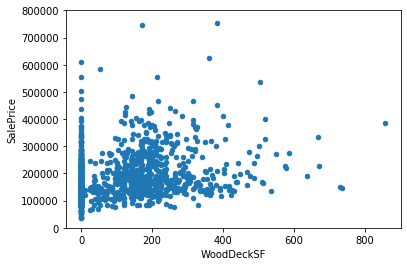

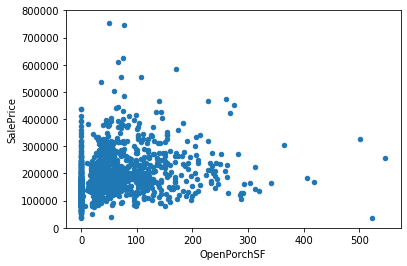

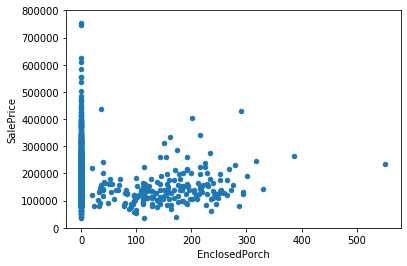

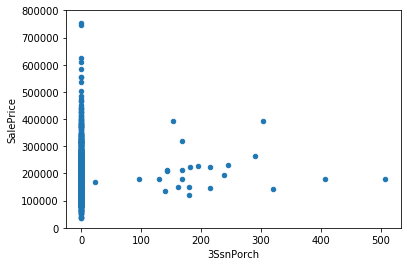

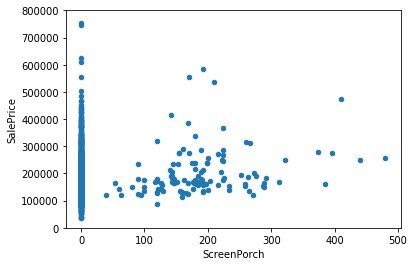

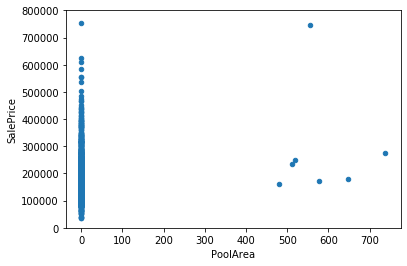

In [3]:
#I would guess that the features that are directly correlated to the sale price are: MSZoning, LotArea, OverallQual, OverallCond, ExterQual, ExterCond,

#Scatter Plot - LotArea
var = 'LotArea'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - OverallQual
var = 'OverallQual'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - OverallCond
var = 'OverallCond'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - BsmtFinSF1
var = 'BsmtFinSF1'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - BsmtFinSF2
var = 'BsmtFinSF2'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - TotalBsmtSF
var = 'TotalBsmtSF'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - 1stFlrSF
var = '1stFlrSF'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - 2ndFlrSF
var = '2ndFlrSF'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - GarageArea
var = 'GarageArea'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - WoodDeckSF
var = 'WoodDeckSF'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - OpenPorchSF
var = 'OpenPorchSF'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - EnclosedPorch
var = 'EnclosedPorch'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - 3SsnPorch
var = '3SsnPorch'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - ScreenPorch
var = 'ScreenPorch'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#Scatter Plot - PoolArea
var = 'PoolArea'
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

To beggin the analysis, I want to separate the categorical from the continuous features.

In [4]:
continuous = data.select_dtypes(include=['float64','int64']).copy()
categorical = data.select_dtypes(include=['object']).copy()

# Initially, ID won't be important to our analysis, since it does not influence the SalesPrice
continuous = continuous.drop(['Id'], axis=1)

Creating features_with_many_zeros to store the feature we are going to eliminate from continuous
Based on the scatter plots, I know that there are features with many zeros values, like PoolArea
I want to identify the ones which have less than 60% of the values, so I can decide how I am going to analyse them 

Features with more than 40% of null values:
MasVnrArea
BsmtFinSF2
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
HalfBath
Fireplaces
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


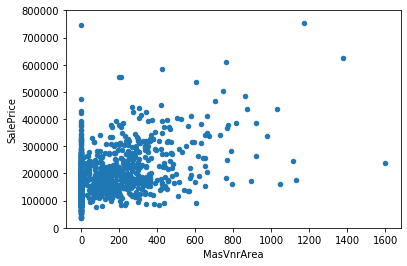

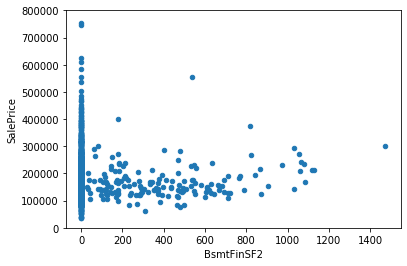

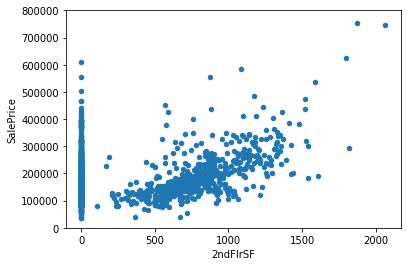

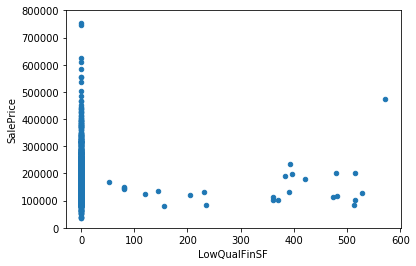

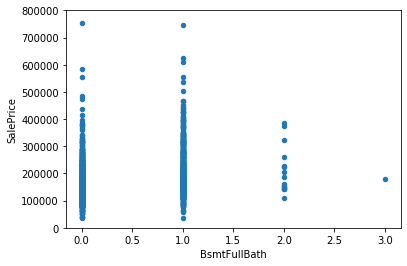

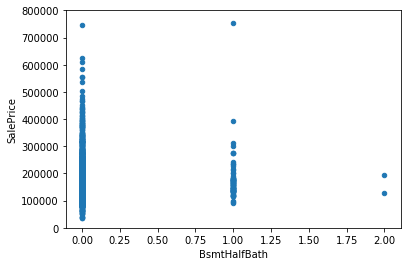

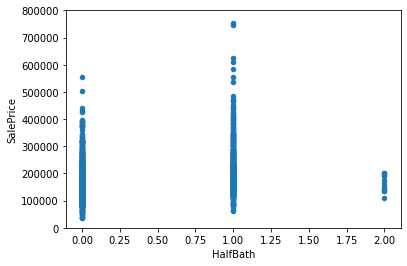

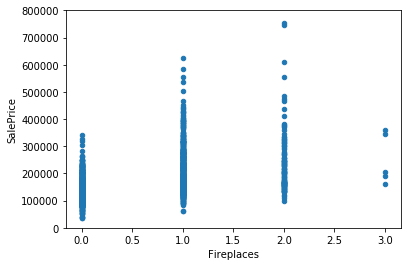

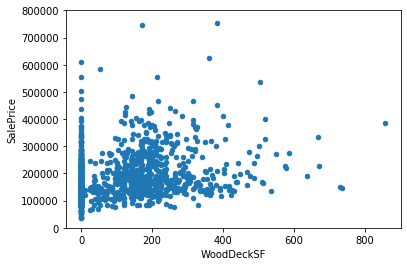

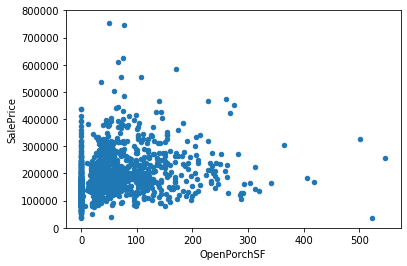

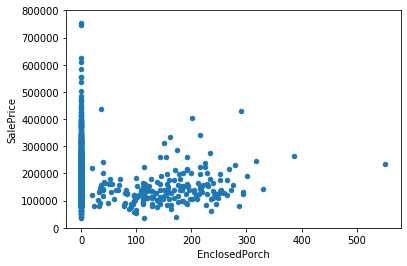

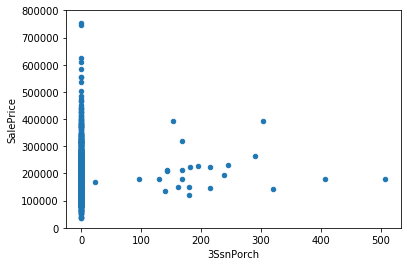

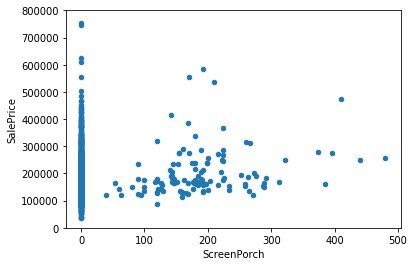

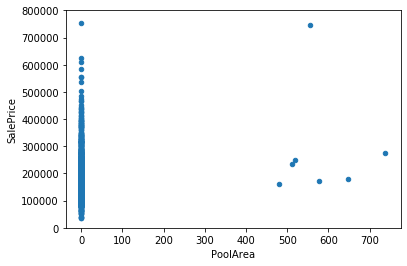

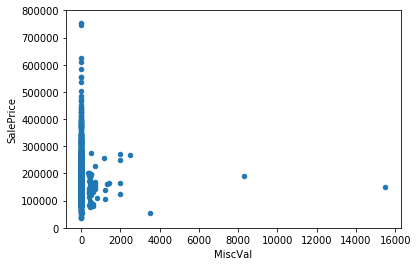

In [5]:
features_with_many_zeros = pd.DataFrame()

print('Features with more than 40% of null values:')
for feature in continuous:
    nonzero_values = (np.count_nonzero(continuous[feature], axis=0))/len(continuous[feature])
    if nonzero_values < 0.6:
        features_with_many_zeros[feature] = continuous[feature]
        print(feature)
        continuous.plot.scatter(x=feature, y='SalePrice', ylim=(0,800000));
        continuous = continuous.drop(feature, axis=1)


Now we know 15 features that have more than 40% of its values equal to zero.
Even though PoolArea shows that only few houses have a pool, it could be correlated to a higher value of SalePrice.
Based on it, I'm going to change its values to a boolean.

In [6]:
for value in features_with_many_zeros["PoolArea"]:
    if value != 0:
        value = 1

Since I want to eliminated some of these features, I'm going to check the coorrelation between them.

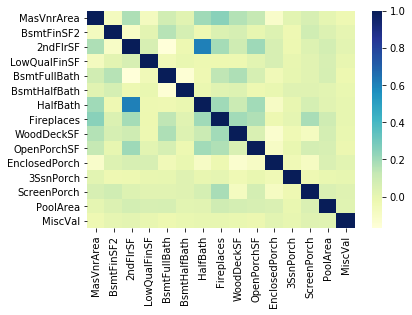

In [7]:
features_with_zeros_corr = features_with_many_zeros.corr(method="pearson")
sns.heatmap(features_with_zeros_corr, cmap = 'YlGnBu', mask = features_with_zeros_corr.isnull())


Now I want to check the correlation between the ramaining continuous features. The approach here is to take into acount that the more null values a feature has, the more affected the result will be.

With respect to the correlation method chosen, Pearson, it is the most simple option for the .corr() function and 

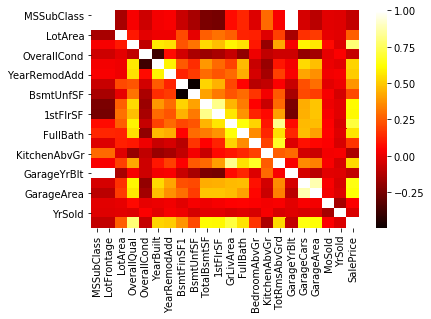

In [8]:
#Dealing with NaN values       
for feature in continuous:
    porcentage_of_zeros = continuous[feature].isnull().sum()/1460
    if porcentage_of_zeros != 0:
        imp = SimpleImputer(strategy="most_frequent")
        continuous[feature] = imp.fit_transform(continuous)

continuous_corr = continuous.corr(method="pearson")
sns.heatmap(continuous_corr, cmap=plt.cm.hot, mask = continuous_corr.isnull())


In [9]:
# Listing the correlation between each feature and SalePrice
coef = abs(continuous_corr["SalePrice"])

#The most relevant features will be the ones with a higher absolute value for the coefficient.
selected_features = coef[coef>0.5]
print(selected_features)
#print(abs(continuous_corr["SalePrice"]))

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


C:\Users\julia\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\julia\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
C:\Users\julia\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume 

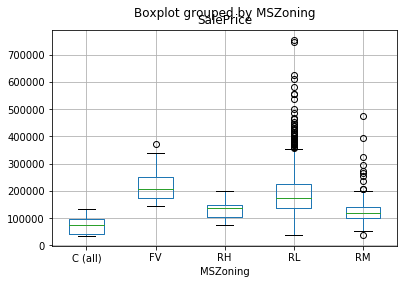

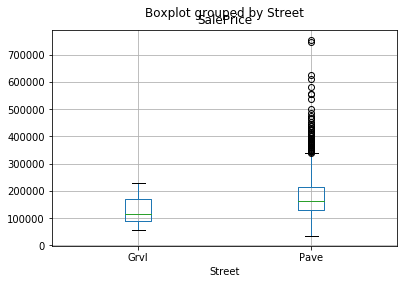

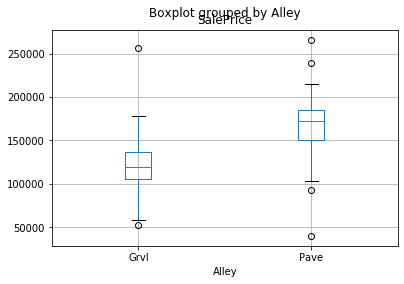

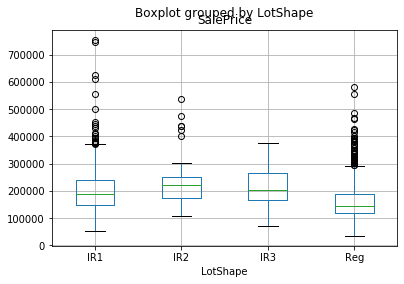

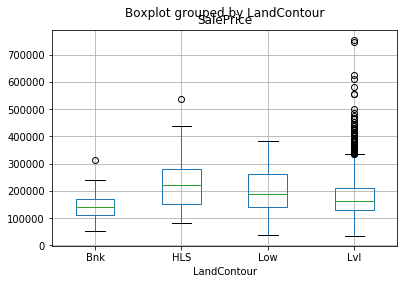

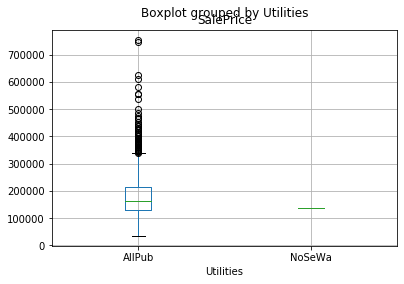

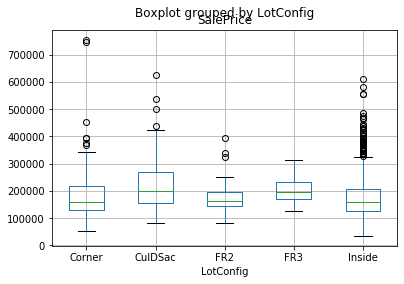

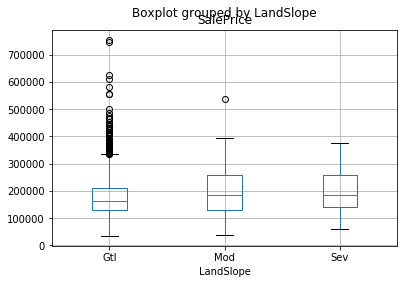

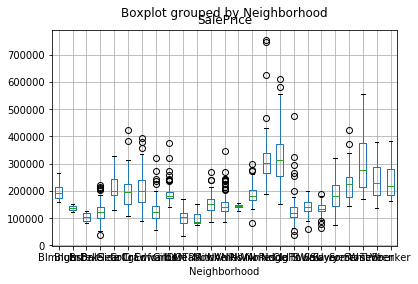

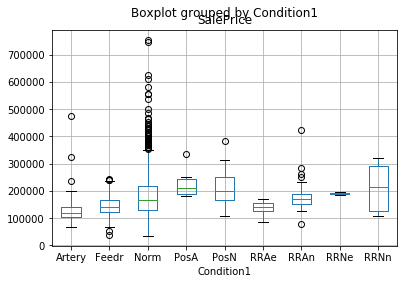

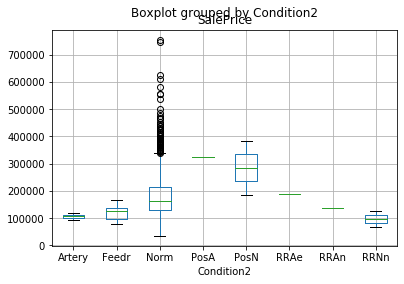

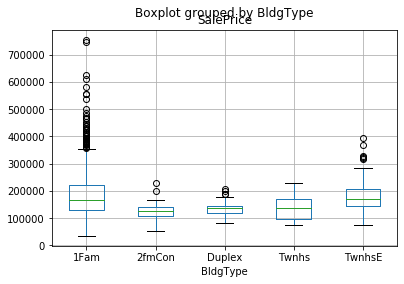

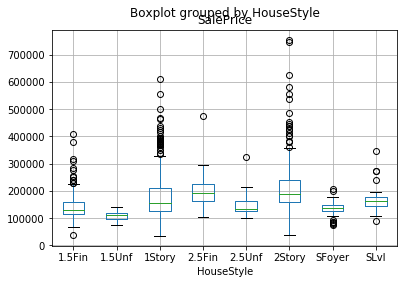

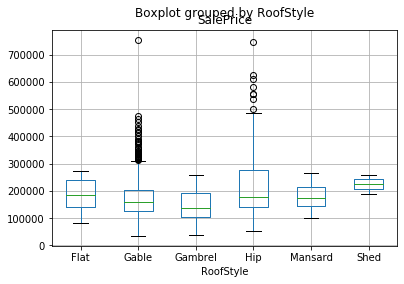

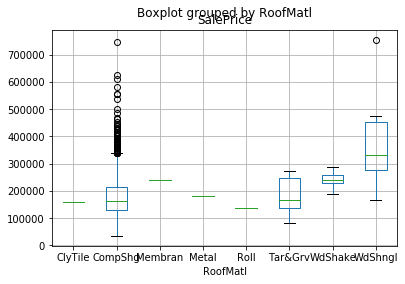

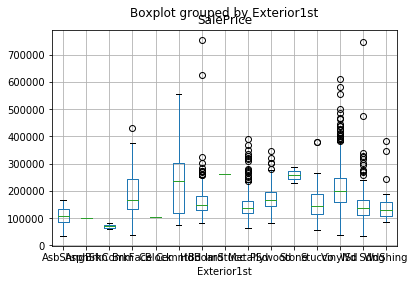

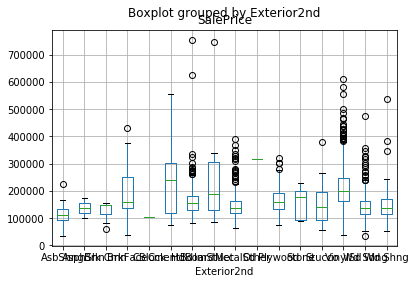

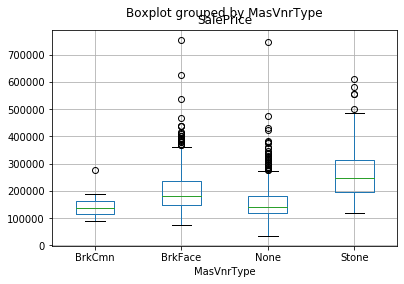

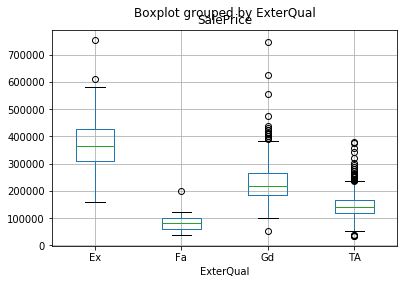

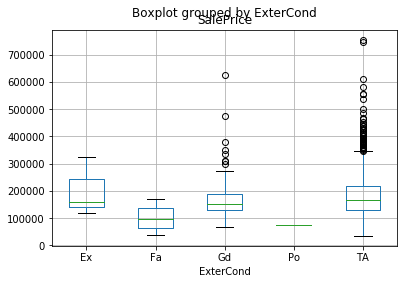

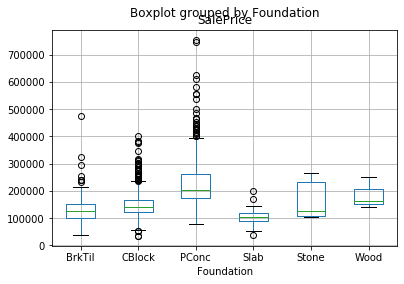

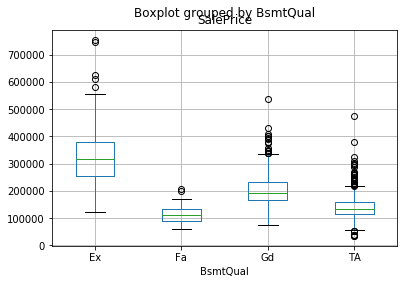

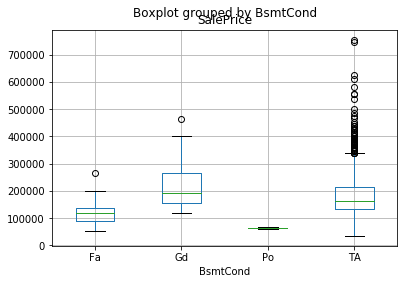

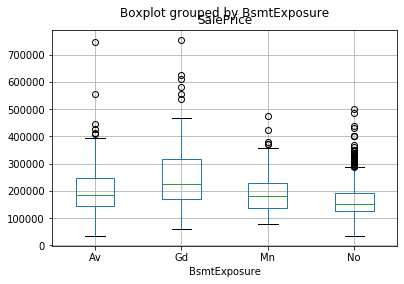

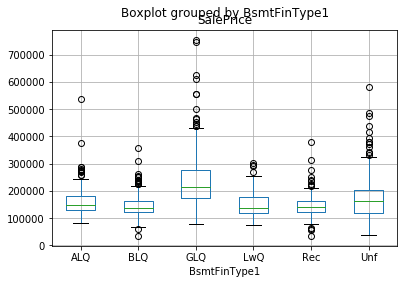

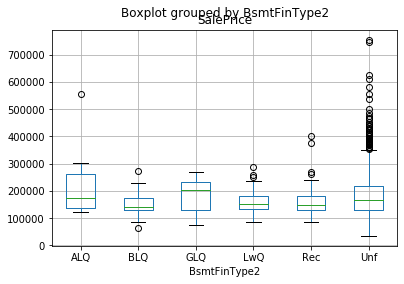

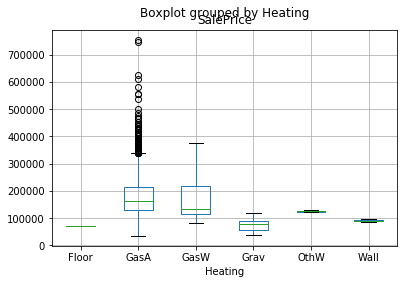

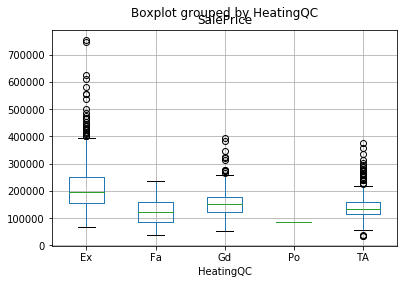

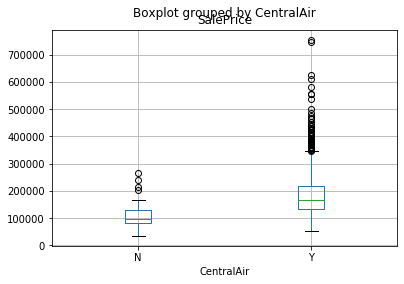

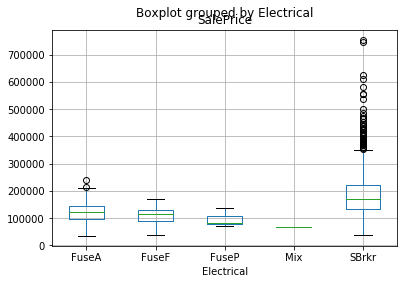

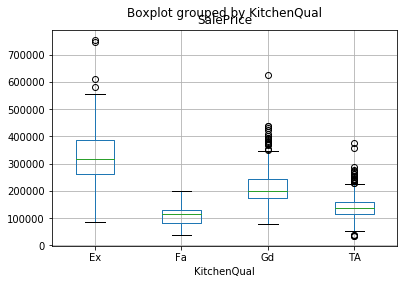

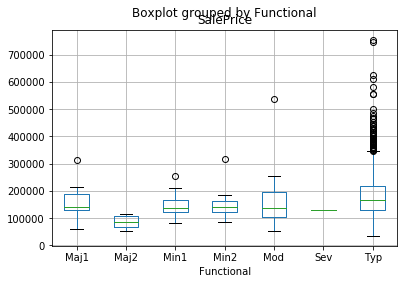

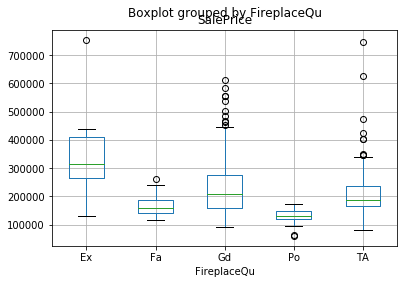

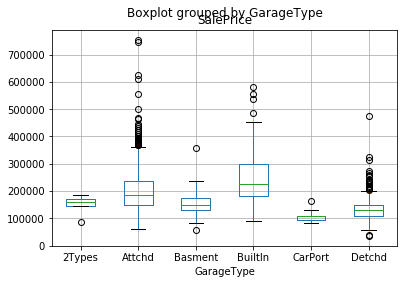

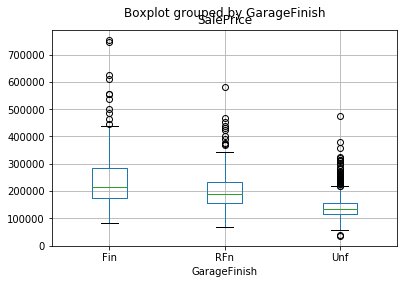

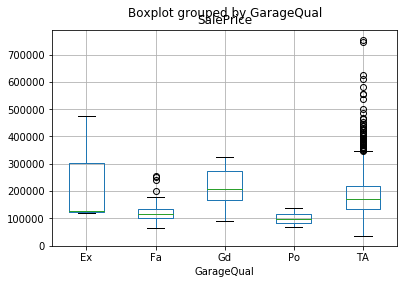

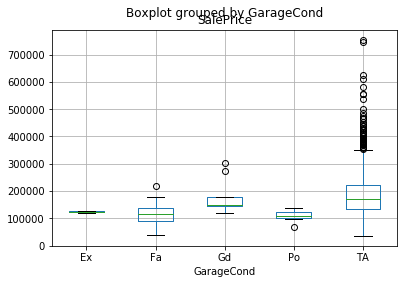

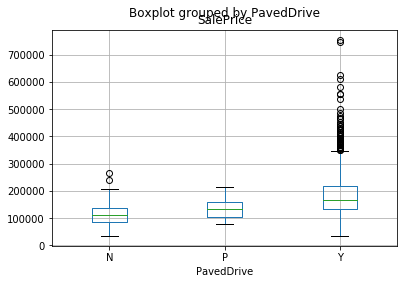

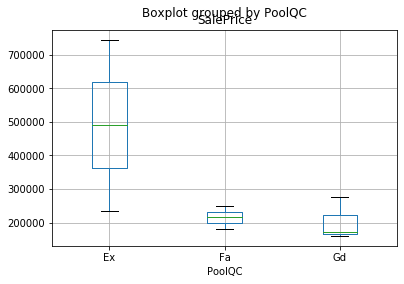

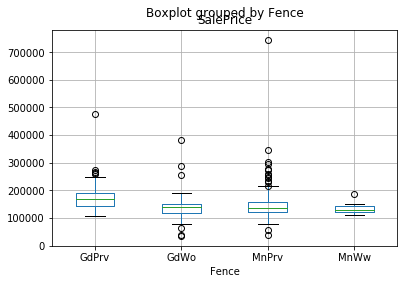

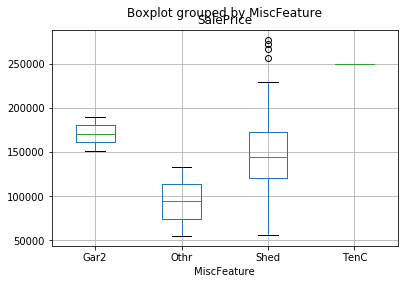

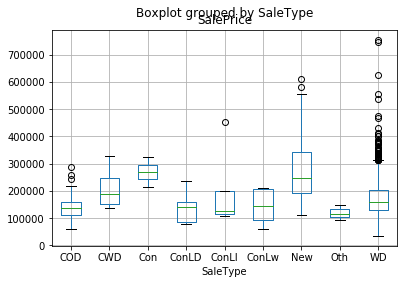

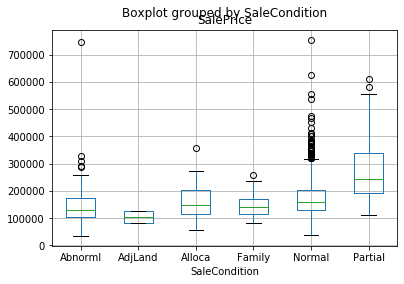

In [10]:
#Analysing the categorical features
#To do the boxplot, we need to add the SalePrice feature to categorical
categorical ["SalePrice"] = data["SalePrice"]

#Ploting the boxplot for each feature
for feature in categorical:
    if feature!="SalePrice":
        categorical.boxplot("SalePrice",feature)

In [11]:
#Creating a categorical_to_numeric to change categorical
categorical_to_numeric = categorical.copy()

#dropping SalePrice for instance
categorical_to_numeric = categorical_to_numeric.drop("SalePrice", axis = 1)

# We are going to analyse only the features less than 50% of null values
for feature in categorical_to_numeric:
    porcentage_of_zeros = categorical_to_numeric[feature].isnull().sum()/1460
    if porcentage_of_zeros > 0.5:
        categorical_to_numeric = categorical_to_numeric.drop(feature, axis=1)

#Dealing with the NaN values        
for feature in categorical_to_numeric:
    porcentage_of_zeros = categorical_to_numeric[feature].isnull().sum()/1460
    if porcentage_of_zeros != 0:
        imp = SimpleImputer(strategy="most_frequent")
        categorical_to_numeric[feature] = imp.fit_transform(categorical_to_numeric)

# Transforming them to numerical values
LE = LabelEncoder()

for feature in categorical_to_numeric:
    feature_LE = LE.fit_transform(categorical_to_numeric[feature])
    categorical_to_numeric[feature] = feature_LE

# OneHotEncoder
OHE = OneHotEncoder()

for feature in categorical_to_numeric:
    feature_OHE_arr = OHE.fit_transform(categorical_to_numeric[[feature]]).toarray()
    categorical_to_numeric[feature] = feature_OHE_arr

#Adding SalePrice again
categorical_to_numeric["SalePrice"] = data["SalePrice"]
    
#Checking the correlation between each feature and SalePrice
categorical_to_numeric_corr = categorical_to_numeric.corr(method="pearson")

# Listing the correlation between each feature and SalePrice
coef_categ = abs(categorical_to_numeric_corr["SalePrice"])

#The most relevant features will be the ones with a higher absolute value for the coefficient.
selected_features = coef_categ[coef_categ>0.4]
print(coef_categ)


MSZoning         0.111257
Street           0.041036
LotShape         0.223284
LandContour      0.101124
Utilities        0.014314
LotConfig        0.004145
LandSlope        0.051116
Neighborhood     0.019066
Condition1       0.106401
Condition2       0.034708
BldgType         0.137483
HouseStyle       0.163466
RoofStyle        0.016433
RoofMatl         0.006897
Exterior1st      0.109126
Exterior2nd      0.099220
MasVnrType       0.111257
ExterQual        0.451164
ExterCond        0.011663
Foundation       0.204117
BsmtQual         0.111257
BsmtCond         0.111257
BsmtExposure     0.111257
BsmtFinType1     0.111257
BsmtFinType2     0.111257
Heating          0.035742
HeatingQC        0.434543
CentralAir       0.251328
Electrical       0.111257
KitchenQual      0.504094
Functional       0.033420
FireplaceQu      0.111257
GarageType       0.111257
GarageFinish     0.111257
GarageQual       0.111257
GarageCond       0.111257
PavedDrive       0.212630
SaleType         0.081047
SaleConditio

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

The coefficients we found for each feature shows the correlation between the feature and SalePrice.
The higher the coefficient value of a feature is, the more correlated this feature is with SalePrice. 
Higgest coefficient of the categorical features: 0.607732 (ExterQual) 
Higgest coefficient of the continuous features: 0.790982 (OverallQual) 

Even thought ExterQual had the higgest coefficient of the categorical features, 
its value is smaller than OverallQual (0.790982), GrLivArea(0.708624), GarageCars (0.640409), GarageArea(0.623431) 
and TotalBsmtSF(0.613581), showing that these features could describe better the SalePrice than OverallQual.
Very interesting to notice that all these features with higher coefficient have no null value, which could indicate
the influence of having null values on your data.

Based on the values found for the coefficient, we can conclude that OverallQual best describes SalePrice

I want to check if this analysis is in accordance with Feature Importance analysis.
There are two apprach we could use to do feature importance analysis with Scikit-learn: Extra trees and Random forest.



C:\Users\julia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02111256 0.02102757 0.07191248 0.045624   0.03960685 0.0708595
 0.07385203 0.067233   0.07315895 0.06992803 0.07386964 0.07628419
 0.01790642 0.03150064 0.00419958 0.05005124 0.02156546 0.0218004
 0.07521902 0.07328843]


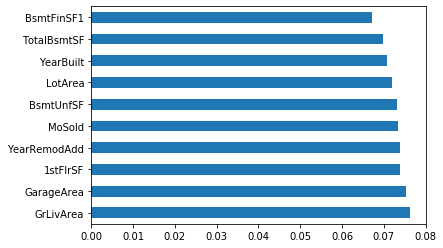

In [12]:
#Continuous values
#continuous.info()
X = continuous.iloc[:,0:20]
Y = continuous.iloc[:,-1]

#print(continuous)

#print(X)
#print(Y)

model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01979238 0.02675861 0.07330435 0.10660629 0.00789407 0.12339918
 0.06516788 0.01189863 0.0573713  0.00549612 0.11307421 0.11816315
 0.0387977  0.00236213 0.04217585 0.03474059 0.02295305 0.04912008
 0.0157404  0.06518403]


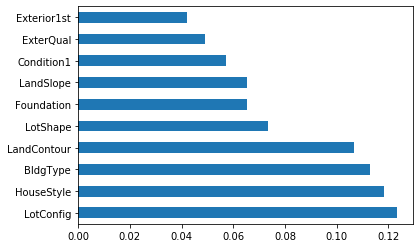

In [13]:
#Categorical values

X = categorical_to_numeric.iloc[:,0:20]
Y = categorical_to_numeric.iloc[:,-1]

#print(continuous)

#print(X)
#print(Y)

model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()